# Submission 1: Basic Statistics, Linear Regression, and Univariate Analysis

This submission requires you to implement linear regression in forecasting and analysis. Linear regression represents a basic econometric tool and it is the starting point for a variety of prediction models such as ARMA and non-linear algorithms. You will also use the Box-Jenkins approach for selecting the optimal parameters of ARMA forecasting model. Exogenous variables, which improve model forecasts, must be indicated at the end of this submission, to combine with finance theory and research.


## Basic Statistics

Download JP Morgan stock historical prices from Yahoo Finance with the following characteristics:

- Period: February1,2018 – December30,2018
- Frequency: Daily
- Priceconsidered in the analysis: Close price adjusted for dividends and splits

In [5]:
# importing libraries
import pandas as pd
import pandas_datareader.data as pdr
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot as ac_plot

In [6]:
# setting up seaborn
sns.set(rc={
    "figure.figsize": (10,5)
})

In [7]:
# pdr.DataReader?
jpm = pdr.DataReader("JPM", start="2018-02-01", end="2018-12-30", data_source="yahoo")['Adj Close']
jpm.head()

Date
2018-01-31    109.523758
2018-02-01    110.659996
2018-02-02    108.207611
2018-02-05    103.018791
2018-02-06    106.152924
Name: Adj Close, dtype: float64

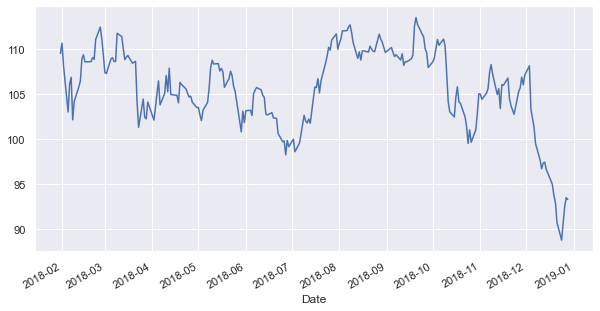

In [8]:
jpm.plot()

**Using this data and R as the programming language, calculate the following:**
1. Average stock value
2. Stock volatility
3. Daily stock return

In [9]:
# Average Stock value
avgStockValue = jpm.mean()
print("Average Stock Value is $"+str(round(avgStockValue, 3)))

Average Stock Value is $105.688


In [10]:
# Stock Volatility
stockVol = jpm.std()
print("Stock Volatility is "+str(round(stockVol, 3)))

Stock Volatility is 4.499


In [11]:
# Daily Stock Return 
# we will use average compunded daily return formula:  daily return = 1 - [(1+r1)(1+r2).......(1+rn)]^1/n
daily_return = (1- jpm.pct_change().dropna().apply(lambda x: 1+x).cumprod()[-1])*100
print("Average Compounded Daily Stock Return: "+ str(round(daily_return,2))+"%")

Average Compounded Daily Stock Return: 14.81%


Using the same data above, calculate the following in Excel (you can use OpenOffice as an alternative to Excel):
1. Average stock value
2. Stock volatility
3. Daily stock return
4. Show JP Morgan stock price evolution using a scatter plot
5. Add a trendline to the graph (trendline options – linear)

## Linear Regression

Implement a two-variable regression in R language using the following data: 
- Explained variable: JPMorganstock (adjusted close price)
- Explanatory variable: S&P500
- Period: February1, 2018–December30, 2018
- Frequency: Daily

In [12]:
# get JMP and SP500(^GSPC) data
stocks_df = pdr.DataReader(["JPM", "^GSPC"], start="2018-02-01", end="2018-12-30", data_source="yahoo")['Adj Close']
stocks_df.head()

Symbols,JPM,^GSPC
Date,,
2018-01-31,109.523758,2823.810059
2018-02-01,110.659996,2821.979980
2018-02-02,108.207611,2762.129883
2018-02-05,103.018791,2648.939941
2018-02-06,106.152924,2695.139893


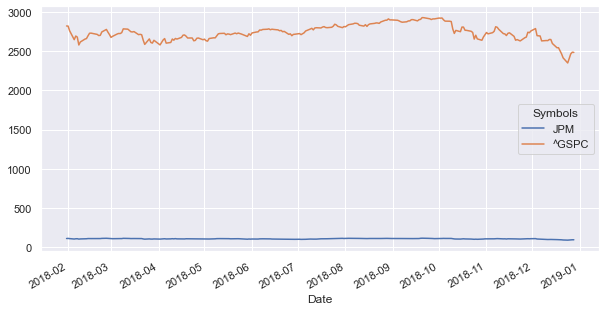

In [13]:
stocks_df.plot()

In [14]:
# set explanatory variable
x = stocks_df['^GSPC']
# adding constant to the OLS
X = sm.add_constant(x)
# set explained variable 
Y = stocks_df['JPM']

# model of the regression
model = sm.OLS(Y,X)

# results
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     314.7
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           8.05e-45
Time:                        12:47:32   Log-Likelihood:                -572.01
No. Observations:                 230   AIC:                             1148.
Df Residuals:                     228   BIC:                             1155.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4537      5.203      2.586      0.0

**With the same variables as above (JP Morgan Stock and S&P500), implement a two-
variable regression in Excel using LINEST function and Analysis ToolPak.**


## Univariate Time Series

Download the following data:

- Datasource: https://fred.stlouisfed.org/series/CSUSHPISA 
- Period considered in the analysis: January 1987 – latestdata 
- Frequency: monthly data

In [15]:
# getting the data from fred data source
csu_data = pdr.DataReader("CSUSHPISA", data_source="fred", start="1987-01-01")
csu_data.head()

,CSUSHPISA
DATE,
1987-01-01,63.988
1987-02-01,64.446
1987-03-01,64.760
1987-04-01,65.153
1987-05-01,65.583


### With this data, do the following using R or Python languages:

#### 1. Forecast S&P/Case-Shiller U.S. National Home Price Index using an ARMA model.

/Users/xebra/Desktop/econometrics-msfe/venv/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


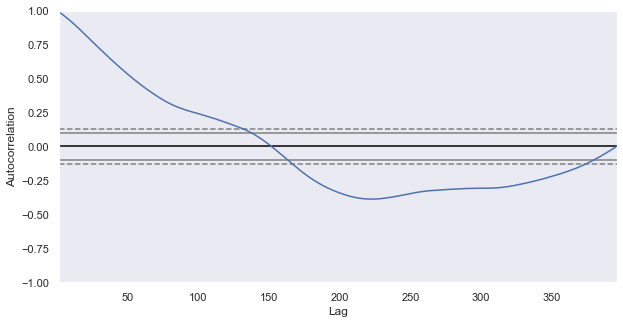

In [16]:
# dir(sm.tsa.stattools)
# sm.tsa.stattools.ARMA?
# dir(sm.tsa)
data_acf = sm.tsa.acf(csu_data, nlags=10)
ac_plot(csu_data.values)

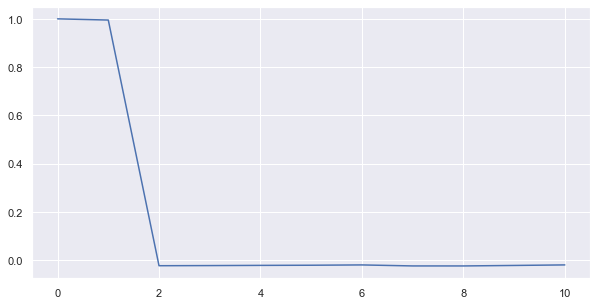

In [17]:
plt.plot(sm.tsa.pacf(csu_data, nlags=10))

In [18]:
result = sm.tsa.ARMA(csu_data,(1,0)).fit()

/Users/xebra/Desktop/econometrics-msfe/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xebra/Desktop/econometrics-msfe/venv/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                              ARMA Model Results                              
Dep. Variable:              CSUSHPISA   No. Observations:                  396
Model:                     ARMA(1, 0)   Log Likelihood                -494.858
Method:                       css-mle   S.D. of innovations              0.825
Date:                Mon, 30 Mar 2020   AIC                            995.717
Time:                        12:48:29   BIC                           1007.661
Sample:                    01-01-1987   HQIC                          1000.449
                         - 12-01-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             130.1275        nan        nan        nan         nan         nan
ar.L1.CSUSHPISA     1.0000        nan        nan        nan         nan         nan
                                

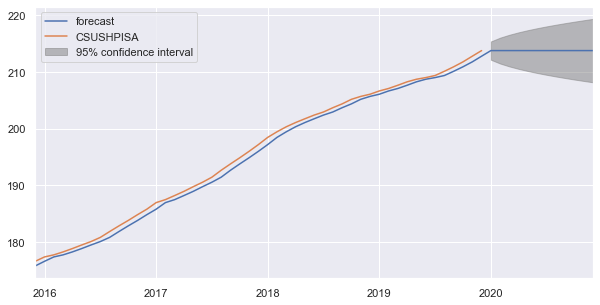

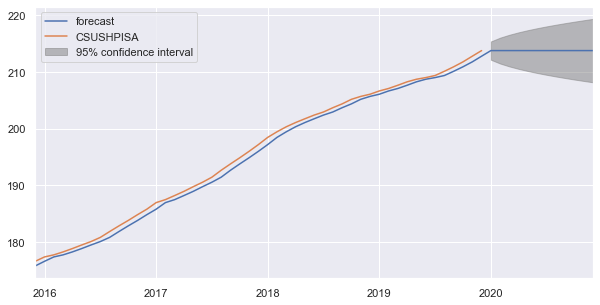

In [25]:
print(result.summary())
result.plot_predict(start="2015-12-01", end="2020-12-01")

#### 2. Implement the Augmented Dickey-Fuller Test for checking the existence of a unit root in Case-Shiller Index series.

In [26]:
# checking for adfuller test
print(sm.tsa.stattools.adfuller(csu_data))

(-0.1708933291326345, 0.9419032896801771, 13, 382, {'1%': -3.4475850438570115, '5%': -2.869135963767125, '10%': -2.5708164748773332}, 4.864538119288568)


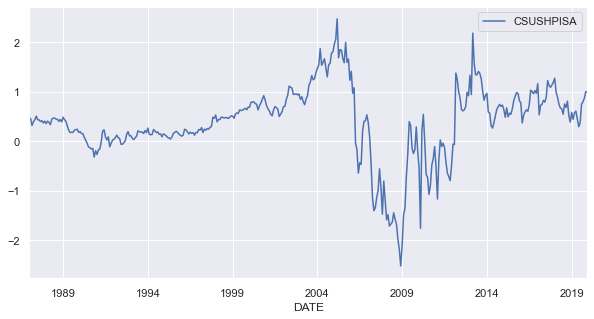

In [27]:
# taking first difference series
csu_data.diff().plot()

In [28]:
# check if the first difference series is stationary
print(sm.tsa.stattools.adfuller(csu_data.diff().dropna()))

(-3.0581692114650143, 0.02980775648094741, 12, 382, {'1%': -3.4475850438570115, '5%': -2.869135963767125, '10%': -2.5708164748773332}, 3.941956951931388)


Here p-value(second term in the result) is high (p = 0.94190) for first series. which fails to reject the null hypothesis. so the we accept the null hypothesis which is the series is non-stationary

but If we take the first difference of the series then do the ADF test. The p value becomes .029, which is very low, so we reject the null hypothesis and accept the alternate hypothesis, as the the series is stationary. 


#### 3. Implement an ARIMA(p,d,q) model. Determine p, d, q using Information Criterion or Box- Jenkins methodology. Comment the results.

In [29]:
# from above example the difference needed to make the series stationary is 1
stat_data = csu_data.diff().dropna()

/Users/xebra/Desktop/econometrics-msfe/venv/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


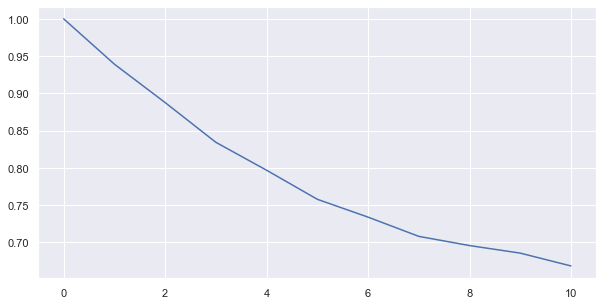

In [30]:
# Box-jenkins method to determin AR/MA order
plt.plot(sm.tsa.stattools.acf(stat_data, nlags=10))

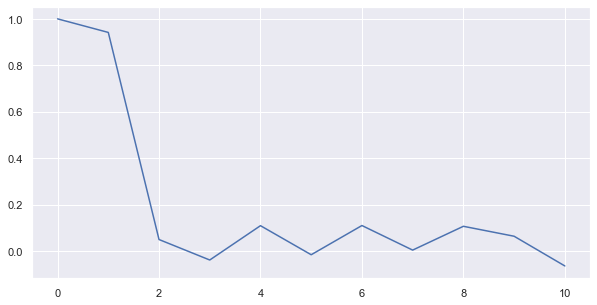

In [31]:
plt.plot(sm.tsa.stattools.pacf(stat_data, nlags=10))

Here as we can see, the first difference of the index data is stationary. so d = 1, If we take autocorrelation function and partial autocorrelation of the difference series, then the acf is gradually declining and the pacf is drastically went down after 1 lag. So, first lag explains the most of the relations. Using box-jenkins method. Its a AR series and the order of AR is 1 (from pacf spike). And MA order is 0. so (p,d,q) = (1,1,0)

/Users/xebra/Desktop/econometrics-msfe/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xebra/Desktop/econometrics-msfe/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.CSUSHPISA   No. Observations:                  395
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -14.414
Method:                       css-mle   S.D. of innovations              0.250
Date:                Mon, 30 Mar 2020   AIC                             34.828
Time:                        12:48:48   BIC                             46.765
Sample:                    02-01-1987   HQIC                            39.557
                         - 12-01-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4039      0.197      2.045      0.041       0.017       0.791
ar.L1.D.CSUSHPISA     0.9385      0.017     55.688      0.000       0.905       0.972
                        

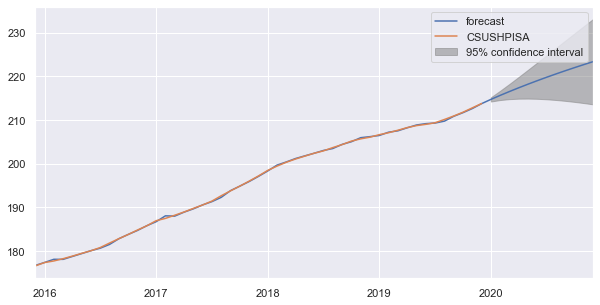

In [32]:
# so its a AR series, order of AR is p= 1, MA, q = 0 and d = 1; so ARIMA(1,1,0) model will be best fit
arima_model = sm.tsa.ARIMA(csu_data, order=(1,1,0))
arima_result = arima_model.fit()
print(arima_result.summary())
# .plot_predict(start="2015-12-01", end="2020-12-01")
forecast_df = arima_result.predict(start="2015-12-01", end="2020-12-01")
print(forecast_df.tail(7))
forecast_plot = arima_result.plot_predict(start="2015-12-01", end="2020-12-01")

#### 4. Forecast the future evolution of Case-Shiller Index using the ARMA model. Test model using in-sample forecasts.

In [33]:
# forcasting the future evolution
# spliting the data into model and test set
model_data = csu_data[:"2010"]
test_data = csu_data["2011":]
start = test_data.index.values[0]
end = test_data.index.values[-1]

model_train = sm.tsa.ARIMA(model_data, order=(1,1,0)).fit()

/Users/xebra/Desktop/econometrics-msfe/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xebra/Desktop/econometrics-msfe/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


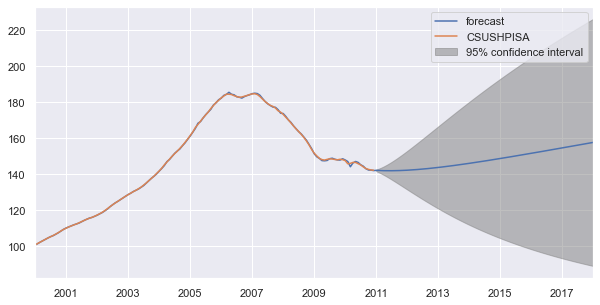

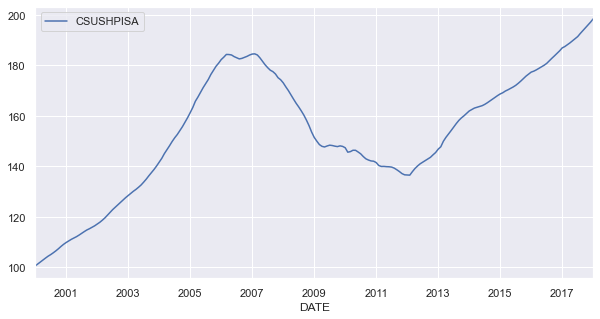

In [34]:
model_forecast= model_train.predict(start, end)
model_train.plot_predict(start="2000-01-01", end="2018-01-01")
csu_data['2000-01-01': '2018-01-01'].plot()

**Submission Requirements**

- Required length for your report: about 500 words. Submit your report in a PDF document separate from the rest of the documents.
- Submit Excel spreadsheets and the source code separately. Add appropriate comments to explain how it works.